In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\nayan\OneDrive\Desktop\ASKME\ask_me.csv')

# DATA PREPARATION AND DATA CLEANING

In [3]:
df.head()

,ID,Brand_Name,Detail,Price,Discount_by_company,Segment,Gender,Total_Buying Frequency
0,1,BEARDO,Perfume Combo,999.0,72.00%,Fragnance,M,100000
1,2,BEARDO,Beard growth,599.0,61.00%,Beard,M,100000
2,3,BEARDO,Bodywash,699.0,23.00%,Skin,M,150000
3,4,BEARDO,Summer Pack,999.0,61.00%,All,M,150000
4,5,BEARDO,PerfumeWhisky Smoke,599.0,51.00%,Fragnance,M,75000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      107 non-null    int64  
 1   Brand_Name              107 non-null    object 
 2   Detail                  107 non-null    object 
 3   Price                   104 non-null    float64
 4   Discount_by_company     103 non-null    object 
 5   Segment                 107 non-null    object 
 6   Gender                  107 non-null    object 
 7   Total_Buying Frequency  107 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 6.8+ KB


From the above result we can observe that Price and Discount has null or missing values

In [5]:
df.describe()

,ID,Price,Total_Buying Frequency
count,107.000000,104.000000,107.000000
mean,54.000000,958.230769,134238.785047
std,31.032241,706.212395,124361.759333
min,1.000000,149.000000,550.000000
25%,27.500000,499.000000,50000.000000
50%,54.000000,799.000000,100000.000000
75%,80.500000,1099.250000,200000.000000
max,107.000000,4599.000000,500000.000000


In [6]:
df.shape

(107, 8)

In [7]:
df['Discount_by_company'] = pd.to_numeric(df['Discount_by_company'].str.rstrip('%'))

Converted discount to percentage data type to  make it easier for calculations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      107 non-null    int64  
 1   Brand_Name              107 non-null    object 
 2   Detail                  107 non-null    object 
 3   Price                   104 non-null    float64
 4   Discount_by_company     103 non-null    float64
 5   Segment                 107 non-null    object 
 6   Gender                  107 non-null    object 
 7   Total_Buying Frequency  107 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.8+ KB


In [9]:
pd.isnull(df).sum()

ID                        0
Brand_Name                0
Detail                    0
Price                     3
Discount_by_company       4
Segment                   0
Gender                    0
Total_Buying Frequency    0
dtype: int64

3 null values and 4 null values in Price and Discount Respectively

In [10]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,ID,Brand_Name,Detail,Price,Discount_by_company,Segment,Gender,Total_Buying Frequency
84,85,KAPIVA,Thyro Booster Combo,NaN,NaN,Wellness,F,100000
85,86,KAPIVA,Thyro Advanced Combo,NaN,NaN,Wellness,F,100000
86,87,KAPIVA,Thyro Lean Combo,1449.0,NaN,Wellness,F,100000
88,89,KAPIVA,Cholest Burn Combo,NaN,NaN,Wellness,F,100000


In [11]:
print("Column names:")
print(df.columns)


Column names:
Index(['ID', 'Brand_Name', 'Detail', 'Price ', 'Discount_by_company',
       'Segment ', 'Gender', 'Total_Buying Frequency'],
      dtype='object')


In [12]:
df.rename(columns={'Segment ': 'Segment', 'Price ': 'Price'}, inplace=True)

In [13]:
print("Column names:")
print(df.columns)

Column names:
Index(['ID', 'Brand_Name', 'Detail', 'Price', 'Discount_by_company', 'Segment',
       'Gender', 'Total_Buying Frequency'],
      dtype='object')


In [14]:
pd.isnull(df).sum()

ID                        0
Brand_Name                0
Detail                    0
Price                     3
Discount_by_company       4
Segment                   0
Gender                    0
Total_Buying Frequency    0
dtype: int64

In [15]:
mean_price_wellness = df[df['Segment'] == 'Wellness']['Price'].mean()

In [16]:
df['Price'] = df['Price'].fillna(mean_price_wellness)

In [17]:
mean_discount_wellness = df[df['Segment'] == 'Wellness']['Discount_by_company'].mean()

In [18]:
df['Discount_by_company'] = df['Discount_by_company'].fillna(mean_discount_wellness)

In [ ]:
Well we replaced the null values of discount and price with mean of price and discount corresponding to their segment 
i.e = Wellness. 

In [19]:
print("Column names:")
print(df.columns)

Column names:
Index(['ID', 'Brand_Name', 'Detail', 'Price', 'Discount_by_company', 'Segment',
       'Gender', 'Total_Buying Frequency'],
      dtype='object')


In [ ]:
Completed  Data Cleaning and pre processing to conduct EDA on it and generate Insights.

# EXPLORATORY DATA  ANALYSIS

In [20]:
cleaned_df = df.copy()

In [21]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      107 non-null    int64  
 1   Brand_Name              107 non-null    object 
 2   Detail                  107 non-null    object 
 3   Price                   107 non-null    float64
 4   Discount_by_company     107 non-null    float64
 5   Segment                 107 non-null    object 
 6   Gender                  107 non-null    object 
 7   Total_Buying Frequency  107 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.8+ KB


In [22]:
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [23]:
cleaned_df.head()

,ID,Brand_Name,Detail,Price,Discount_by_company,Segment,Gender,Total_Buying Frequency
0,1,BEARDO,Perfume Combo,999.0,72.0,Fragnance,M,100000
1,2,BEARDO,Beard growth,599.0,61.0,Beard,M,100000
2,3,BEARDO,Bodywash,699.0,23.0,Skin,M,150000
3,4,BEARDO,Summer Pack,999.0,61.0,All,M,150000
4,5,BEARDO,PerfumeWhisky Smoke,599.0,51.0,Fragnance,M,75000


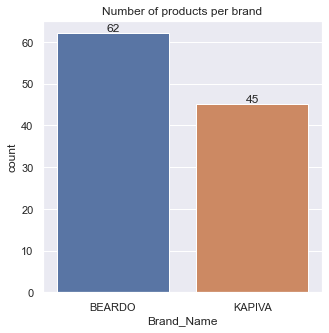

In [80]:
ax = sns.countplot(x = 'Brand_Name',data = cleaned_df)
plt.title('Number of products per brand')
sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
cleaned_df['Brand_Name'].value_counts()

BEARDO    62
KAPIVA    45
Name: Brand_Name, dtype: int64

In [85]:
brand_segment_count = df.groupby('Brand_Name')['Segment'].nunique().reset_index()


In [86]:
brand_segment_count

,Brand_Name,Segment
0,BEARDO,9
1,KAPIVA,5


<AxesSubplot:title={'center':'Number of segments per brand'}, xlabel='Brand_Name', ylabel='Segment'>

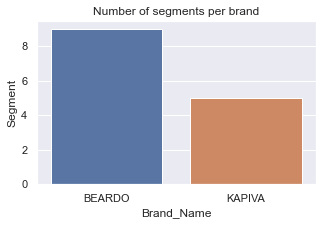

In [88]:
plt.title('Number of segments per brand')
sns.barplot(data = brand_segment_count, x ='Brand_Name',y= 'Segment')


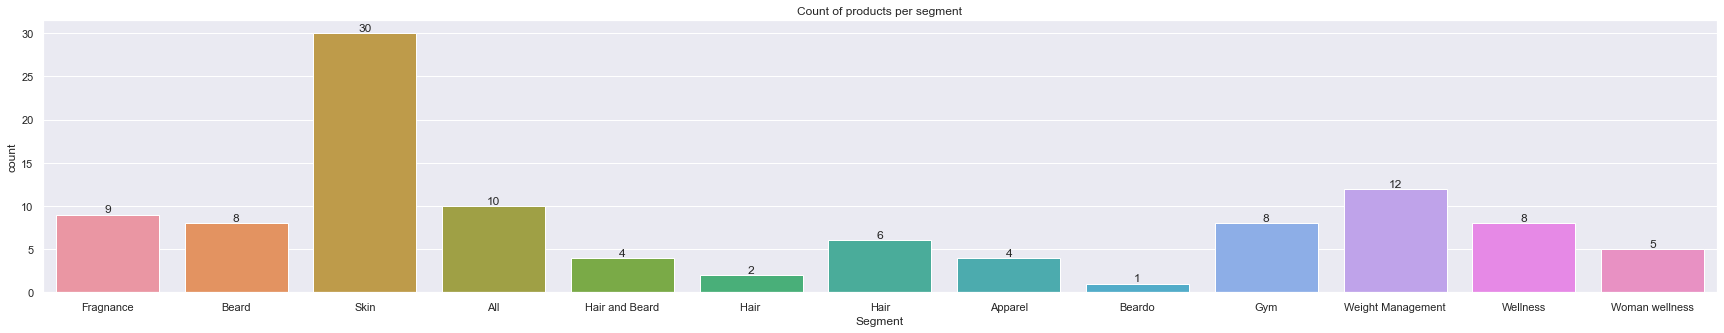

In [94]:
ax = sns.countplot(x = 'Segment',data = cleaned_df)
sns.set(rc={'figure.figsize':(30,12)})
plt.title('Count of products per segment')
for bars in ax.containers:
    ax.bar_label(bars)

Skin was the most sold segment while if we talk about Beardo , beardo flagship products were sold very less in number.If we talk about Kapiva Woman woman wellness did not got that much buyers but they sold gym and weight management products the most.

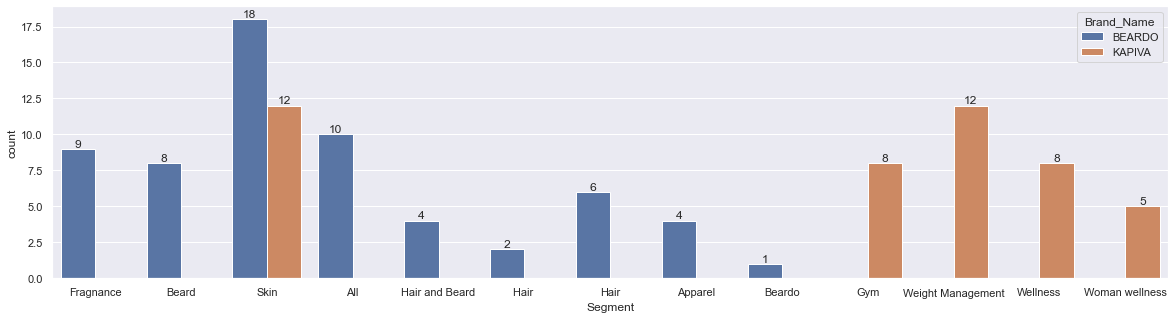

In [36]:
ax = sns.countplot(x = 'Segment', hue = 'Brand_Name',data = cleaned_df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [31]:

cleaned_df.head()

,ID,Brand_Name,Detail,Price,Discount_by_company,Segment,Gender,Total_Buying Frequency
0,1,BEARDO,Perfume Combo,999.0,72.0,Fragnance,M,100000
1,2,BEARDO,Beard growth,599.0,61.0,Beard,M,100000
2,3,BEARDO,Bodywash,699.0,23.0,Skin,M,150000
3,4,BEARDO,Summer Pack,999.0,61.0,All,M,150000
4,5,BEARDO,PerfumeWhisky Smoke,599.0,51.0,Fragnance,M,75000


In [49]:
segment_grouped_df = df.groupby('Segment')['Total_Buying Frequency'].sum().reset_index()

In [50]:
segment_grouped_df.head()

,Segment,Total_Buying Frequency
0,All,1040000
1,Apparel,40000
2,Beard,1386000
3,Beardo,200000
4,Fragnance,315000


In [99]:
brand_grouped_df = df.groupby(['Segment', 'Brand_Name'])['Total_Buying Frequency'].sum().reset_index()

In [100]:
brand_grouped_df

,Segment,Brand_Name,Total_Buying Frequency
0,All,BEARDO,1040000
1,Apparel,BEARDO,40000
2,Beard,BEARDO,1386000
3,Beardo,BEARDO,200000
4,Fragnance,BEARDO,315000
5,Gym,KAPIVA,925000
6,Hair,BEARDO,925000
7,Hair,BEARDO,175000
8,Hair and Beard,BEARDO,625000
9,Skin,BEARDO,2082000


<AxesSubplot:title={'center':'Comparison between both the brands'}, xlabel='Segment', ylabel='Total_Buying Frequency'>

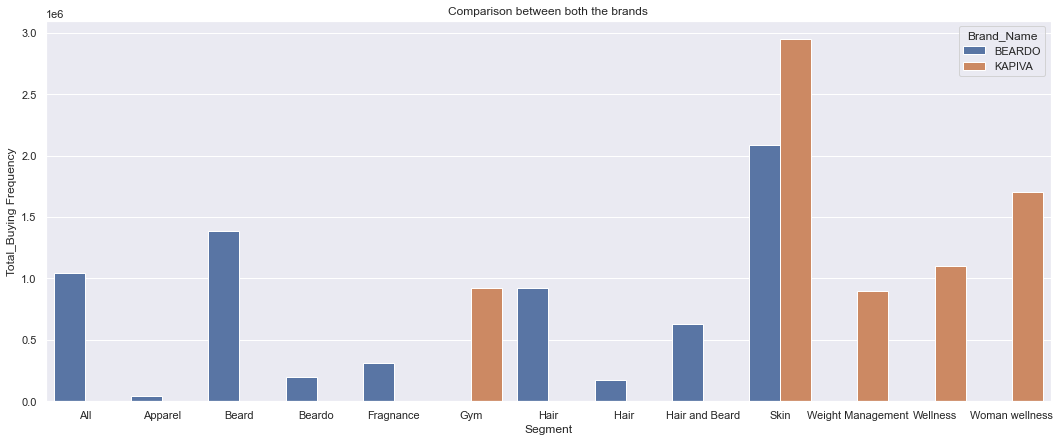

In [106]:
sns.set(rc={'figure.figsize':(18,7)})
plt.title('Comparison between both the brands')
sns.barplot(data =brand_grouped_df , x ='Segment',y= 'Total_Buying Frequency', hue='Brand_Name')

In [102]:
discount_grouped_df = df.groupby(['Segment', 'Brand_Name'])['Discount_by_company'].sum().reset_index()

<AxesSubplot:title={'center':'Total Discount Offered for each domain per brand'}, xlabel='Segment', ylabel='Discount_by_company'>

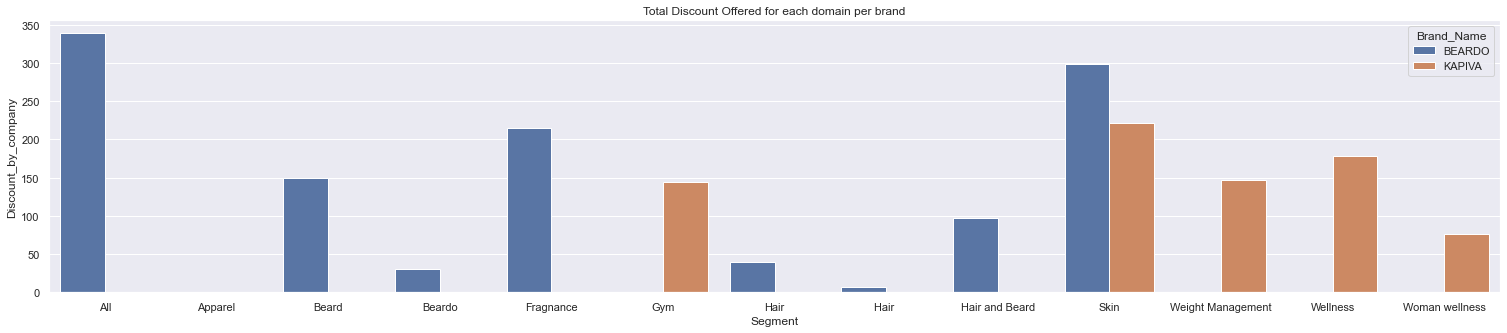

In [104]:
sns.set(rc={'figure.figsize':(26,5)})
plt.title('Total Discount Offered for each domain per brand')
sns.barplot(data =discount_grouped_df , x ='Segment',y= 'Discount_by_company',hue = 'Brand_Name')

Here we can observe that Skin segment had the most discount for both the brands , but if we talk about beardo it discounted the combo segments quite well and Kapiva discounted the wellness segments .